# Data Wrangling, EDA, and Visualization (21 points in total)

Ta-Feng is a retail warehouse in Taiwan that mainly sells food-products though it stocks some office and home products. Like Costco and Sam's Club, it operates on a club structure wherein people buy a membership to gain access to the store. As a result, purchases can be traced to specific customers. In this workshop, we will use this database to practice data wrangling, EDA, and Visualization.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy, Datascience, pandas modules.
import numpy as np
import pandas as pd
import seaborn as sns

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Importing Data
In this section, we run through some problems that you might face as you go through the innocuous-sounding process of "importing data." We also have you process some variables that aren't in the most user-friendly form.

# Age Classes
We'll start by looking at age_classes.txt, which is a lookup table for our main Ta Feng table.

In [2]:
#Mac or Linux
!head "age_classes.txt"

#Windows
# %alias head powershell -command "& {Get-Content %s -Head 10}"
# %head age_classes.txt

#output (1 point)

A 0-25
B 25-29
C 30-34
D 35-39
E 40-44
F 45-49
G 50-54
H 55-59
I 60-64
J 65-120

Let's read in age_classes.txt as a data frame called age_classes. Use the column names provided below.

In [4]:
age_class_columns = ['code', 'age_range']
age_classes = pd.read_csv('age_classes.txt', sep=" ",  
                          header=None, names=age_class_columns)
age_classes # output (1 point)

,code,age_range
0,A,0-25
1,B,25-29
2,C,30-34
3,D,35-39
4,E,40-44
5,F,45-49
6,G,50-54
7,H,55-59
8,I,60-64
9,J,65-120


Let's make sure the type of age_range in the data frame age_classes matches your answer.

In [6]:
age_classes['age_range'] = age_classes['age_range'].astype('category')
age_classes.dtypes #output (1 point)

code           object
age_range    category
dtype: object

Perhaps at some point we would like to work with the age data numerically. Derive two numerical columns from age_range called age_min and age_max, which contain the left and right endpoints of age_range, respectively.

In [7]:
age_classes[['age_min', 'age_max']] = (
    age_classes['age_range']
    .str.split("-", expand=True)
    .astype('int')
)
age_classes #output (1 point)

,code,age_range,age_min,age_max
0,A,0-25,0,25
1,B,25-29,25,29
2,C,30-34,30,34
3,D,35-39,35,39
4,E,40-44,40,44
5,F,45-49,45,49
6,G,50-54,50,54
7,H,55-59,55,59
8,I,60-64,60,64
9,J,65-120,65,120


To have a single column representing age, we could reduce the two endpoints to a single number. Compute an additional age_center attribute that is equal to the midpoint of age_range, e.g., the age_center of 0-5 is 2.5.

In [8]:
age_classes['age_center'] = (age_classes['age_max'] + age_classes['age_min']) / 2.
age_classes # output (1 point)

,code,age_range,age_min,age_max,age_center
0,A,0-25,0,25,12.5
1,B,25-29,25,29,27.0
2,C,30-34,30,34,32.0
3,D,35-39,35,39,37.0
4,E,40-44,40,44,42.0
5,F,45-49,45,49,47.0
6,G,50-54,50,54,52.0
7,H,55-59,55,59,57.0
8,I,60-64,60,64,62.0
9,J,65-120,65,120,92.5


# Residence Area
Now inspect residence_area.txt. We'll read in the data in the next cell.

In [9]:
!head "residence_area.txt" 
# Windows: replace similarly
# output (1 point)

A: 105
B: 106
C: 110
D: 114
E: 115
F: 221
G: others
H: unknown


Let's read in residence_area.txt as a data frame called residence_areas. Use the column names provided below.

In [10]:
# if you use a single character delimiter, it uses the faster engine ... 
residence_areas = pd.read_csv('residence_area.txt', 
                              delimiter=':',
                              header=None, 
                              names=['code','area'])

# need to remove the leading whitespace
residence_areas['area'] = residence_areas['area'].str.strip()

residence_areas # output (1 point)

,code,area
0,A,105
1,B,106
2,C,110
3,D,114
4,E,115
5,F,221
6,G,others
7,H,unknown


# TaFeng Transactions
In this part, we load TaFengTransactions.txt.

In [11]:
!head "TaFengTransactions.txt" 
# Windows: replace similarly
# output (1 point)

In [12]:
tafeng_transactions = pd.read_csv('TaFengTransactions.txt', delimiter=';')

# remove potential leading or trailing whitespace
tafeng_transactions['age_code'] = tafeng_transactions['age_code'].str.strip()
tafeng_transactions['residence_area'] = tafeng_transactions['residence_area'].str.strip()

tafeng_transactions.head() # output 1 point

,entry_date,transaction_time,customer_id,age_code,residence_area,product_subclass,product_id,amount,asset,sales_price
0,2016-12-26,2001-01-15 00:00:00,1786439,G,H,110109,4710043552065,1,144,190
1,2016-12-26,2001-01-15 00:00:00,98946,E,E,100312,4710543111014,1,32,38
2,2016-12-26,2001-01-15 00:00:00,905602,D,E,500206,4710114322115,1,64,79
3,2016-12-26,2001-01-15 00:00:00,1964295,E,E,530106,4713813010123,1,174,147
4,2016-12-26,2001-01-15 00:00:00,2146553,B,D,100217,8801019421013,1,47,52


In [13]:
tafeng_full = pd.merge(tafeng_transactions, age_classes,
                      how='left', left_on='age_code', right_on='code')
tafeng_full = tafeng_full.drop('code', axis=1)

tafeng_full = pd.merge(tafeng_full, residence_areas, 
                      how='left', left_on = 'residence_area', right_on = 'code') 
tafeng_full = tafeng_full.drop('code', axis=1)

tafeng_full.head() #output 1 point

,entry_date,transaction_time,customer_id,age_code,residence_area,product_subclass,product_id,amount,asset,sales_price,age_range,age_min,age_max,age_center,area
0,2016-12-26,2001-01-15 00:00:00,1786439,G,H,110109,4710043552065,1,144,190,50-54,50.0,54.0,52.0,unknown
1,2016-12-26,2001-01-15 00:00:00,98946,E,E,100312,4710543111014,1,32,38,40-44,40.0,44.0,42.0,115
2,2016-12-26,2001-01-15 00:00:00,905602,D,E,500206,4710114322115,1,64,79,35-39,35.0,39.0,37.0,115
3,2016-12-26,2001-01-15 00:00:00,1964295,E,E,530106,4713813010123,1,174,147,40-44,40.0,44.0,42.0,115
4,2016-12-26,2001-01-15 00:00:00,2146553,B,D,100217,8801019421013,1,47,52,25-29,25.0,29.0,27.0,114


# Guided EDA

We may be interested in what the purchase data can tell us about TaFeng's business and the behavior of their customers. While there are many aspects of this data set that we could look into, we start by exploring customer behavior at the product level to get a feel for the variables, data type, cleanliness, missingness, and distributions. For the moment, assume that the data consists of all transactions in the 3 month period (i.e. no transactions are missing from this data set). 

# Example 1
Calculate the number of shopping trips each customer made in the 3-month period. Then make a histogram that summarizes the information. Assume that transactions occurring on the same day can be grouped together into one trip (e.g. All purchases on January 1 by the same customer should be lumped together).

Text(0.5, 1.0, 'Repeat Business')

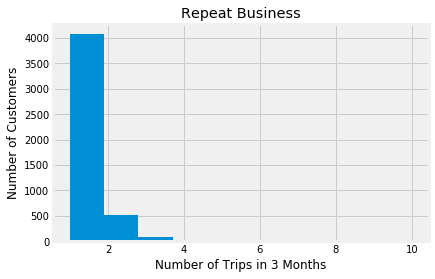

In [14]:
rpt_business = tafeng_full.groupby('customer_id')['transaction_time'].nunique()
rpt_business.hist(bins=rpt_business.max())

plt.xlabel('Number of Trips in 3 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business') # output 1 point

A customer that is on the left side of the distribution shops only sporadically at TaFeng, and a customer on the right side of the distribution shops at TaFeng very frequently. The distribution is skewed right with nearly all the customers shopping fewer than 3 times in the three month period. Now it is hard to see the distribution for frequent customers (>=4 trips). Let's zoom in to better view the shape of the distribution of frequent customers.

(0, 20)

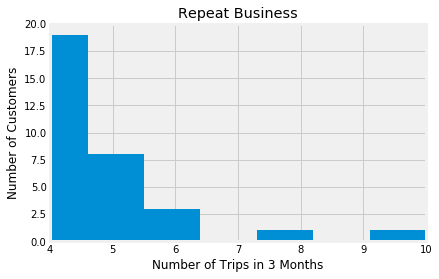

In [15]:
rpt_business.hist(bins=rpt_business.max())

plt.xlabel('Number of Trips in 3 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')

plt.xlim(4, 10)
plt.ylim(0, 20) # output 1 point

# Example 2
In this example, we will investigate temporal trends in shopping behavior. We begin with the technical details of date-time data.

In [16]:
time_format = "%Y-%m-%d %H:%M:%S"
tafeng_full['transaction_time'] = pd.to_datetime(tafeng_full['transaction_time'], 
                                                format = time_format)
tafeng_full.head() # output 1 point

,entry_date,transaction_time,customer_id,age_code,residence_area,product_subclass,product_id,amount,asset,sales_price,age_range,age_min,age_max,age_center,area
0,2016-12-26,2001-01-15,1786439,G,H,110109,4710043552065,1,144,190,50-54,50.0,54.0,52.0,unknown
1,2016-12-26,2001-01-15,98946,E,E,100312,4710543111014,1,32,38,40-44,40.0,44.0,42.0,115
2,2016-12-26,2001-01-15,905602,D,E,500206,4710114322115,1,64,79,35-39,35.0,39.0,37.0,115
3,2016-12-26,2001-01-15,1964295,E,E,530106,4713813010123,1,174,147,40-44,40.0,44.0,42.0,115
4,2016-12-26,2001-01-15,2146553,B,D,100217,8801019421013,1,47,52,25-29,25.0,29.0,27.0,114


Now we have the time data in a usable format, we can start looking into customer trends over time. Make a line plot of the number of unique customers per day against day. Note that we will change the granularity at which we are examining our data.

Text(0.5, 1.0, 'Unique Customers Per Day')

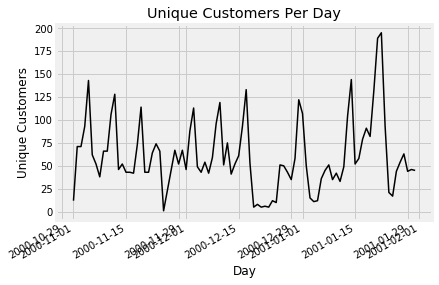

In [17]:
tafeng_full.groupby('transaction_time')['customer_id'].nunique().plot(color='black', lw=1.5)
plt.xlabel('Day')
plt.ylabel('Unique Customers')
plt.title('Unique Customers Per Day') # output 1 point

What if we are interested in holidays?

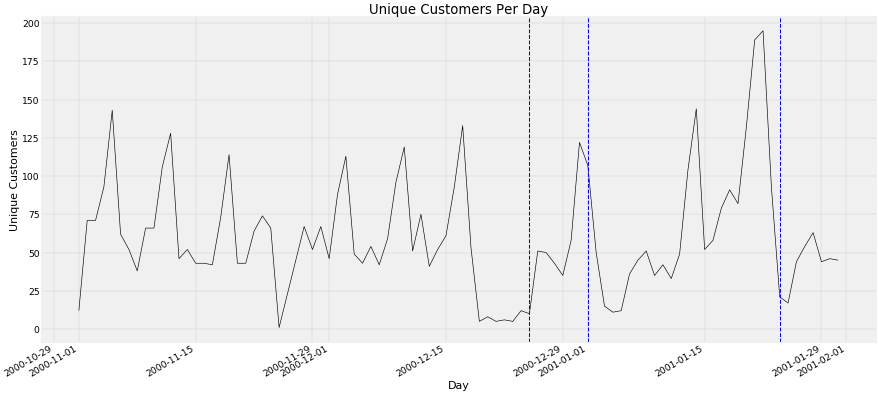

In [39]:
fig=plt.figure(figsize=(32, 16), dpi= 30)
matplotlib.rcParams.update({'font.size': 22})

tafeng_full.groupby('transaction_time')['customer_id'].nunique().plot(color='black', lw=1.5)
plt.xlabel('Day')
plt.ylabel('Unique Customers')
plt.title('Unique Customers Per Day')

holidays = ['2000-12-25', '2001-01-01', '2001-01-24']
for holiday in holidays:
    plt.axvline(holiday, lw=2.5, color='#0000ff', ls='dashed') # output 1 point